In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("AirPassengers.csv")

In [5]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df.set_index('Month',inplace=True)

# Summarize the data sets

In [9]:
df.shape

(144, 1)

In [10]:
df.dtypes

,0
#Passengers,int64


# Performing EDA

In [11]:
df.isnull().sum()

,0
#Passengers,0


# Plot your data

<Axes: xlabel='Month'>

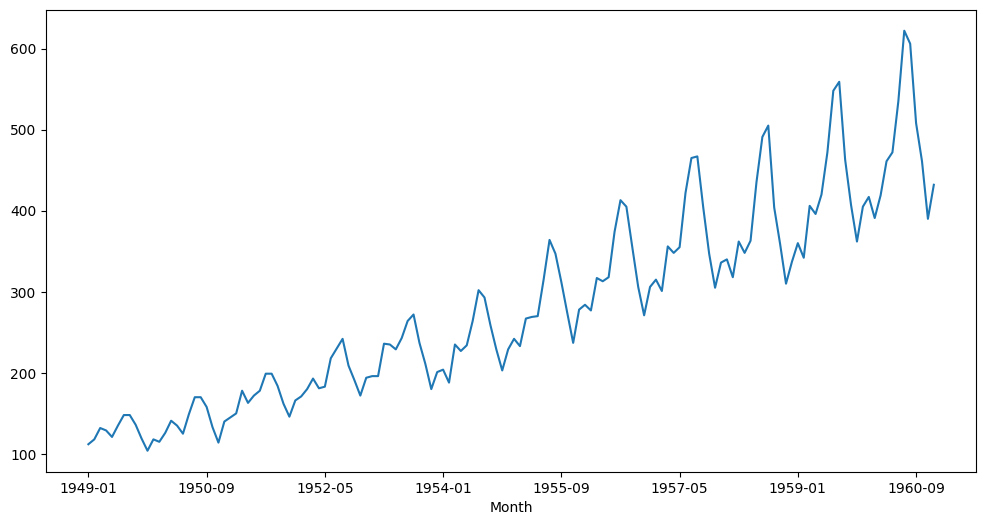

In [13]:
df['#Passengers'].plot(figsize=(12,6))

# Figure Out Order for ARIMA Model

In [14]:
from pmdarima import auto_arima

In [16]:
stepwise_fit = auto_arima(df['#Passengers'],suppress_warnings=True)



In [17]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Wed, 16 Oct 2024   AIC                           1365.825
Time:                        20:40:07   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1731     85.616      8.458      0.000     556.369     891.977
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Loading ARIMA Model

In [18]:
from statsmodels.tsa.arima_model import ARIMA

# Split Data into Training and Testing

In [19]:
print(df.shape)

(144, 1)


In [20]:
df.head(12)

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136


In [21]:
train = df.iloc[:-24]

In [22]:
train

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1958-08,505
1958-09,404
1958-10,359


In [23]:
test = df.iloc[-24:]
test

,#Passengers
Month,
1959-01,360
1959-02,342
1959-03,406
1959-04,396
1959-05,420
1959-06,472
1959-07,548
1959-08,559
1959-09,463


In [24]:
print(train.shape, test.shape)

(120, 1) (24, 1)


# Train the model

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model=ARIMA(train['#Passengers'],order=(5, 2, 4))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
model

In [36]:
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(5, 2, 4)   Log Likelihood                -537.966
Date:                Wed, 16 Oct 2024   AIC                           1095.932
Time:                        20:53:32   BIC                           1123.639
Sample:                    01-01-1949   HQIC                          1107.182
                         - 12-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7116      0.114     -6.240      0.000      -0.935      -0.488
ar.L2          0.4832      0.094      5.155      0.000       0.299       0.667
ar.L3          0.1484      0.130      1.139      0.255      -0.107       0.404
ar.L4         -0.5773      0.125     -4.635      0.000      -0.821      -0.333
ar.L5         -0.1253      0.116     -1.079      0.281      -0.353       0.102
ma.L1         -0.0714      0.634     -0.113      0.910      -1.313       1.171
ma.L2         -1.6954      0.572     -2.966      0.003      -2.816      -0.575
ma.L3         -0.1735      0.711     -0.244      0.807      -1.566       1.219
ma.L4          0.9421      0.647      1.457      0.145      -0.325       2.209
sigma2       466.8953    307.676      1.517      0.129    -136.138    1069.929
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 5.45
Prob(Q):                              0.71   Prob(JB):                         0.07
Heteroskedasticity (H):               6.07   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Make Predictions on Test Set

In [38]:
start = len(train)

In [39]:
end = len(train) + len(test) - 1

In [40]:
start, end

(120, 143)

In [41]:
pred = model.predict(start=start,end=end)

In [51]:
pred

,predicted_mean
1959-01-01,388.008485
1959-02-01,412.229330
1959-03-01,442.789277
1959-04-01,435.379162
1959-05-01,430.688101
1959-06-01,419.112333
1959-07-01,407.813431
1959-08-01,414.521466
1959-09-01,410.718318
1959-10-01,426.770370


In [50]:
test #Actual test Data

,#Passengers
Month,
1959-01,360
1959-02,342
1959-03,406
1959-04,396
1959-05,420
1959-06,472
1959-07,548
1959-08,559
1959-09,463


ConversionError: Failed to convert value(s) to axis units: array([Period('1959-01', 'M'), Period('1959-02', 'M'),
       Period('1959-03', 'M'), Period('1959-04', 'M'),
       Period('1959-05', 'M'), Period('1959-06', 'M'),
       Period('1959-07', 'M'), Period('1959-08', 'M'),
       Period('1959-09', 'M'), Period('1959-10', 'M'),
       Period('1959-11', 'M'), Period('1959-12', 'M'),
       Period('1960-01', 'M'), Period('1960-02', 'M'),
       Period('1960-03', 'M'), Period('1960-04', 'M'),
       Period('1960-05', 'M'), Period('1960-06', 'M'),
       Period('1960-07', 'M'), Period('1960-08', 'M'),
       Period('1960-09', 'M'), Period('1960-10', 'M'),
       Period('1960-11', 'M'), Period('1960-12', 'M')], dtype=object)

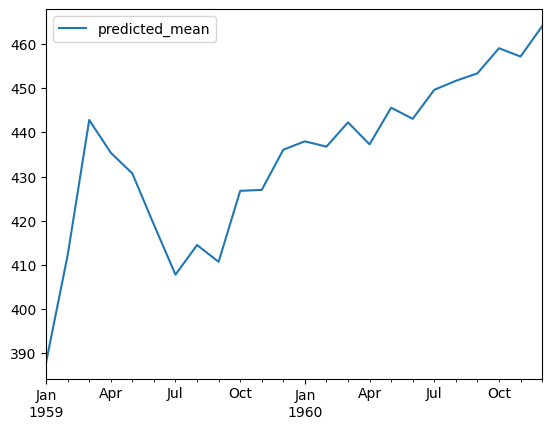

In [53]:
pred.plot(legend='Model_Prediction') # Model Prediction
test["#Passengers"].plot(legend=True) # Actual Values